## Data Visulization 📊

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Reading the DataFile

In [2]:
dataset = pd.read_csv("Combined_Complete_Clean.csv")


In [3]:
dataset.head()

,Unnamed: 0.1,Unnamed: 0,AD_Name,AD_id,Engine Capacity,Category,Body Consition,model Year,Milage,Fuel Type,Transmission,Color,City Registered,Price,Ad_link,ad_Date,Car_Name,Brand_Name
0,0,0,Changan Alsvin 1.5L DCT Lumiere 2022,8205716.0,1500,Sedan,Excellent,2022,46000,Petrol,Automatic,Steller White,Punjab,39,https://www.pakwheels.com/used-cars/changan-al...,2/23/2024,Alsvin,Changan
1,1,1,Toyota Yaris Hatchback 2020,8284829.0,1000,Sedan,Excellent,2020,100000,Petrol,Automatic,Silver,Un-Registered,45.75,https://www.pakwheels.com/used-cars/toyota-yar...,2/23/2024,Yaris,Toyota
2,2,2,Changan Alsvin 1.5L DCT Lumiere 2023,8422204.0,1500,Sedan,Excellent,2023,14717,Petrol,Automatic,Lunar Silver,Islamabad,42.5,https://www.pakwheels.com/used-cars/changan-al...,2/23/2024,Alsvin,Changan
3,3,3,Changan Alsvin 1.5L DCT Comfort 2022,8367180.0,1500,Sedan,Excellent,2022,40737,Petrol,Automatic,Steller White,Islamabad,31,https://www.pakwheels.com/used-cars/changan-al...,2/23/2024,Alsvin,Changan
4,4,4,Changan Alsvin 1.5L DCT Lumiere 2021,8307134.0,1500,Sedan,Excellent,2021,59155,Petrol,Automatic,Steller White,Karachi,35,https://www.pakwheels.com/used-cars/changan-al...,2/23/2024,Alsvin,Changan


Dropping unwanted Columns

In [4]:
dataset.drop(columns='Unnamed: 0',inplace= True)
dataset.drop(columns='Unnamed: 0.1',inplace= True)


In [5]:
dataset.head()

,AD_Name,AD_id,Engine Capacity,Category,Body Consition,model Year,Milage,Fuel Type,Transmission,Color,City Registered,Price,Ad_link,ad_Date,Car_Name,Brand_Name
0,Changan Alsvin 1.5L DCT Lumiere 2022,8205716.0,1500,Sedan,Excellent,2022,46000,Petrol,Automatic,Steller White,Punjab,39,https://www.pakwheels.com/used-cars/changan-al...,2/23/2024,Alsvin,Changan
1,Toyota Yaris Hatchback 2020,8284829.0,1000,Sedan,Excellent,2020,100000,Petrol,Automatic,Silver,Un-Registered,45.75,https://www.pakwheels.com/used-cars/toyota-yar...,2/23/2024,Yaris,Toyota
2,Changan Alsvin 1.5L DCT Lumiere 2023,8422204.0,1500,Sedan,Excellent,2023,14717,Petrol,Automatic,Lunar Silver,Islamabad,42.5,https://www.pakwheels.com/used-cars/changan-al...,2/23/2024,Alsvin,Changan
3,Changan Alsvin 1.5L DCT Comfort 2022,8367180.0,1500,Sedan,Excellent,2022,40737,Petrol,Automatic,Steller White,Islamabad,31,https://www.pakwheels.com/used-cars/changan-al...,2/23/2024,Alsvin,Changan
4,Changan Alsvin 1.5L DCT Lumiere 2021,8307134.0,1500,Sedan,Excellent,2021,59155,Petrol,Automatic,Steller White,Karachi,35,https://www.pakwheels.com/used-cars/changan-al...,2/23/2024,Alsvin,Changan


### Data Pre-Processing

In [6]:
dataset.isnull().sum()

AD_Name                0
AD_id                  0
Engine Capacity        0
Category               0
Body Consition         0
model Year             0
Milage                 0
Fuel Type              0
Transmission           0
Color                  0
City Registered        0
Price                  0
Ad_link            11803
ad_Date                0
Car_Name               0
Brand_Name             0
dtype: int64

### making an copy of the dataset

In [7]:
copy_dataset = dataset

In [8]:
indices_to_drop = copy_dataset[copy_dataset['Price'].str.contains('Call for price')].index

indices_to_drop


Index([   67,   142,   143,   337,   338,   339,   438,   439,   440,   458,
       ...
       16315, 16413, 16488, 16489, 16803, 16826, 16878, 16879, 17055, 17084],
      dtype='int64', length=324)

#### Dropping the rows where car price is 'Call for price'

In [9]:
copy_dataset.drop(indices_to_drop, inplace=True)

In [10]:
# checking again
copy_dataset[copy_dataset['Price'].str.contains('Call for price')].index


Index([], dtype='int64')

As price , engine capacity , model year , milage has to be in int of float so converting them 

In [11]:
copy_dataset.dtypes

AD_Name             object
AD_id              float64
Engine Capacity      int64
Category            object
Body Consition      object
model Year           int64
Milage              object
Fuel Type           object
Transmission        object
Color               object
City Registered     object
Price               object
Ad_link             object
ad_Date             object
Car_Name            object
Brand_Name          object
dtype: object

In [12]:
# chaning price column from object type to float
copy_dataset['Price'] = copy_dataset['Price'].astype('float64')

In [13]:
copy_dataset[copy_dataset['Milage'].str.contains('km')].index

Index([24689, 24690, 24691, 24692, 24693, 24694, 24695, 24696, 24697, 24698,
       24699, 24700, 24701, 24702, 24703, 24704, 24705, 24706, 24707, 24708,
       24709, 24710, 24711, 24712, 24713, 24714, 24715, 24716, 24717, 24718,
       24719, 24720, 24721],
      dtype='int64')

In [14]:
copy_dataset.loc[24689]['Ad_link']

'https://www.pakwheels.com/used-cars/suzuki-wagon-r-2021-for-sale-in-karachi-8416587'

In [15]:
# there are some rows where milage contains km in it so replacing km and , with '' 

copy_dataset['Milage'] = copy_dataset['Milage'].str.replace("km",'')
copy_dataset['Milage'] = copy_dataset['Milage'].str.replace(",",'')


In [16]:
copy_dataset[copy_dataset['Milage'].str.contains('km')].index

Index([], dtype='int64')

In [17]:
copy_dataset[copy_dataset['Milage'].str.contains(',')].index

Index([], dtype='int64')

In [18]:
# changing milage from object type to int64
copy_dataset['Milage'] = copy_dataset['Milage'].astype('int64')

In [19]:
copy_dataset.dtypes

AD_Name             object
AD_id              float64
Engine Capacity      int64
Category            object
Body Consition      object
model Year           int64
Milage               int64
Fuel Type           object
Transmission        object
Color               object
City Registered     object
Price              float64
Ad_link             object
ad_Date             object
Car_Name            object
Brand_Name          object
dtype: object

In [20]:
copy_dataset['ad_Date']

0           2/23/2024
1           2/23/2024
2           2/23/2024
3           2/23/2024
4           2/23/2024
             ...     
24717    Feb 19, 2024
24718    Feb 22, 2024
24719    Feb 21, 2024
24720    Feb 21, 2024
24721    Feb 19, 2024
Name: ad_Date, Length: 24398, dtype: object

### converting the ad_date column into data format



In [21]:
# Convert dates in "Mar 08, 2024" format to "3/08/2024" format if not already formatted
converted_dates = []
for date_str in copy_dataset['ad_Date']:
    #print('original-->',date_str)
    try:
        converted_date = pd.to_datetime(date_str, errors='raise').strftime('%m/%d/%Y')  # Convert to desired format
        #print('converted-->',converted_date)
        converted_dates.append(converted_date)
    except ValueError:
        converted_dates.append(date_str)  # Keep the original date if conversion fails
print(converted_dates)
# Update the 'ad_Date' column with converted dates or original values
copy_dataset['ad_Date'] = converted_dates

# Print the DataFrame with converted dates
print(pd.Series(converted_dates).isnull().sum())

['02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/23/2024', '02/2

In [22]:
copy_dataset

,AD_Name,AD_id,Engine Capacity,Category,Body Consition,model Year,Milage,Fuel Type,Transmission,Color,City Registered,Price,Ad_link,ad_Date,Car_Name,Brand_Name
0,Changan Alsvin 1.5L DCT Lumiere 2022,8205716.0,1500,Sedan,Excellent,2022,46000,Petrol,Automatic,Steller White,Punjab,39.00,https://www.pakwheels.com/used-cars/changan-al...,02/23/2024,Alsvin,Changan
1,Toyota Yaris Hatchback 2020,8284829.0,1000,Sedan,Excellent,2020,100000,Petrol,Automatic,Silver,Un-Registered,45.75,https://www.pakwheels.com/used-cars/toyota-yar...,02/23/2024,Yaris,Toyota
2,Changan Alsvin 1.5L DCT Lumiere 2023,8422204.0,1500,Sedan,Excellent,2023,14717,Petrol,Automatic,Lunar Silver,Islamabad,42.50,https://www.pakwheels.com/used-cars/changan-al...,02/23/2024,Alsvin,Changan
3,Changan Alsvin 1.5L DCT Comfort 2022,8367180.0,1500,Sedan,Excellent,2022,40737,Petrol,Automatic,Steller White,Islamabad,31.00,https://www.pakwheels.com/used-cars/changan-al...,02/23/2024,Alsvin,Changan
4,Changan Alsvin 1.5L DCT Lumiere 2021,8307134.0,1500,Sedan,Excellent,2021,59155,Petrol,Automatic,Steller White,Karachi,35.00,https://www.pakwheels.com/used-cars/changan-al...,02/23/2024,Alsvin,Changan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24717,Honda City i-DSI 2006,8404583.0,1300,Sedan,Excellent,2006,235000,Petrol,Manual,Blue,Sindh,16.75,https://www.pakwheels.com/used-cars/honda-city...,02/19/2024,City,Honda
24718,Honda Civic Oriel 1.8 i-VTEC CVT 2017,8317239.0,1800,Sedan,Excellent,2017,57000,Petrol,Automatic,White,Islamabad,50.75,https://www.pakwheels.com/used-cars/honda-civi...,02/22/2024,Civic,Honda
24719,Suzuki Wagon R Hybrid FX 2018,8410219.0,650,Hatchback,Excellent,2018,148450,Hybrid,Automatic,Turquoise,Islamabad,33.20,https://www.pakwheels.com/used-cars/suzuki-wag...,02/21/2024,Wagon-R,Suzuki
24720,Suzuki Wagon R VXL 2022,8411910.0,1000,Hatchback,Excellent,2022,11000,Petrol,Manual,Solid White,Punjab,30.15,https://www.pakwheels.com/used-cars/suzuki-wag...,02/21/2024,Wagon-R,Suzuki


In [23]:
copy_dataset['ad_Date'] = pd.to_datetime(copy_dataset['ad_Date'])
copy_dataset['ad_Date']

0       2024-02-23
1       2024-02-23
2       2024-02-23
3       2024-02-23
4       2024-02-23
           ...    
24717   2024-02-19
24718   2024-02-22
24719   2024-02-21
24720   2024-02-21
24721   2024-02-19
Name: ad_Date, Length: 24398, dtype: datetime64[ns]

In [24]:
copy_dataset.dtypes

AD_Name                    object
AD_id                     float64
Engine Capacity             int64
Category                   object
Body Consition             object
model Year                  int64
Milage                      int64
Fuel Type                  object
Transmission               object
Color                      object
City Registered            object
Price                     float64
Ad_link                    object
ad_Date            datetime64[ns]
Car_Name                   object
Brand_Name                 object
dtype: object

In [25]:
copy_dataset.isnull().sum()

AD_Name                0
AD_id                  0
Engine Capacity        0
Category               0
Body Consition         0
model Year             0
Milage                 0
Fuel Type              0
Transmission           0
Color                  0
City Registered        0
Price                  0
Ad_link            11553
ad_Date                0
Car_Name               0
Brand_Name             0
dtype: int64

### Now its time to plot the graphs to find the realtions

In [26]:
def histogram(column_name):
    plt.figure(figsize=(20,6))
    sns.histplot(data=dataset[column_name],bins=20,kde=True,color='orange')
    plt.title(column_name+'distribution')
    plt.show()

In [27]:
def count_plot(column):
    plt.figure(figsize = (20,6))
    sns.countplot(data = dataset , x= column,color='red')
    plt.title(f"Count Plot - {column}")
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation = 90)
    plt.show()

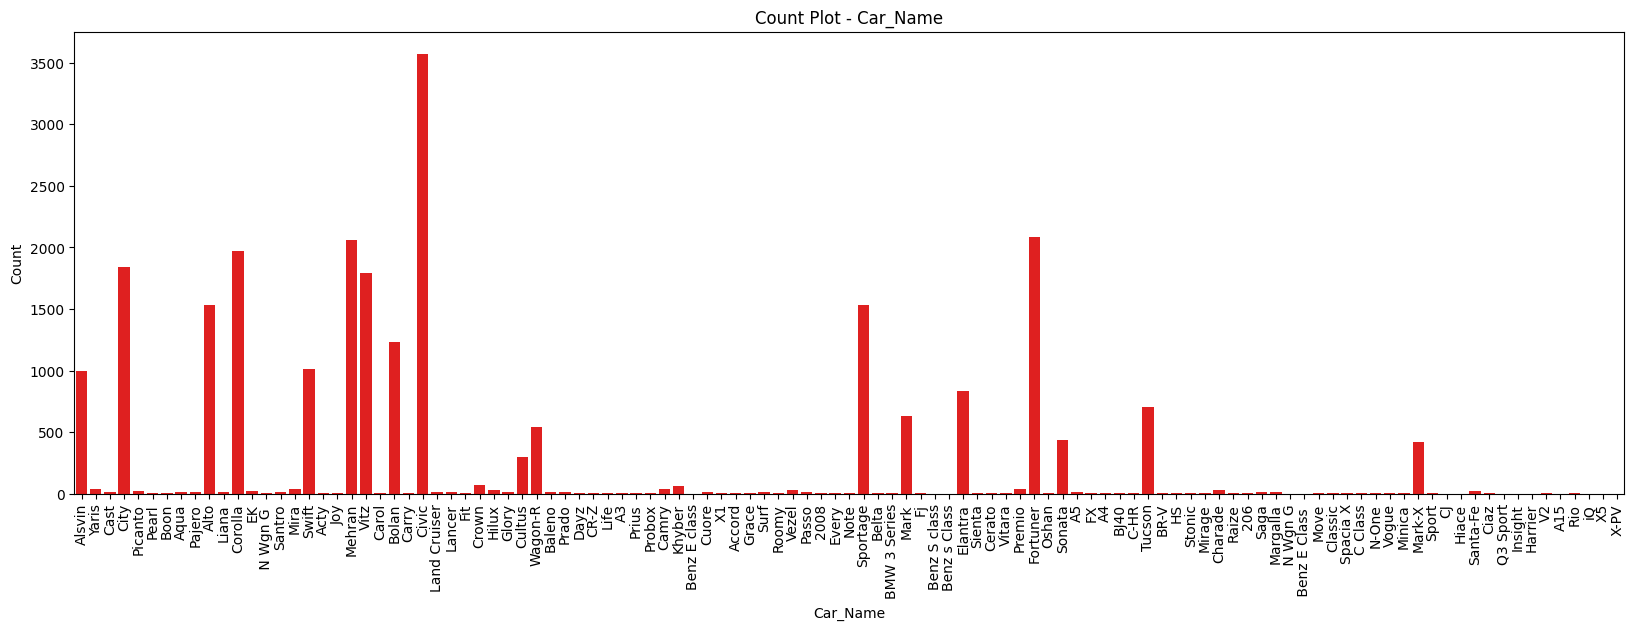

In [28]:
count_plot('Car_Name')

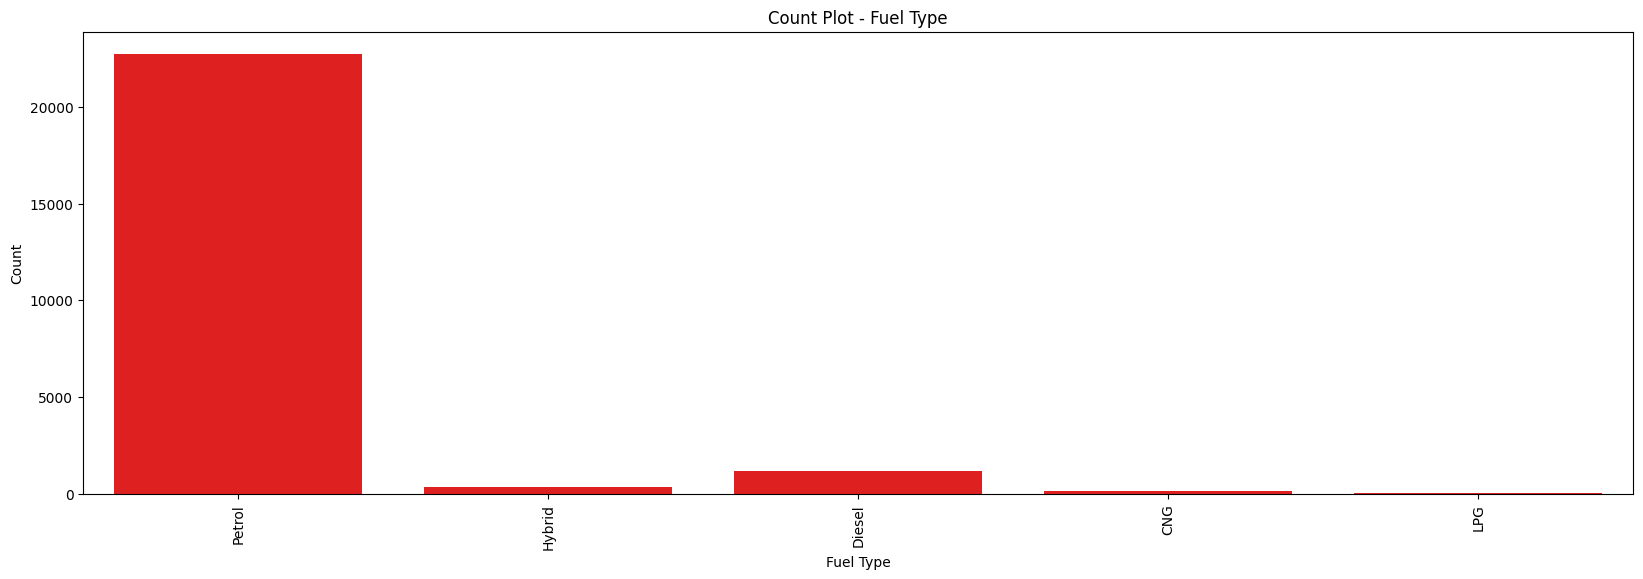

In [29]:
count_plot('Fuel Type')

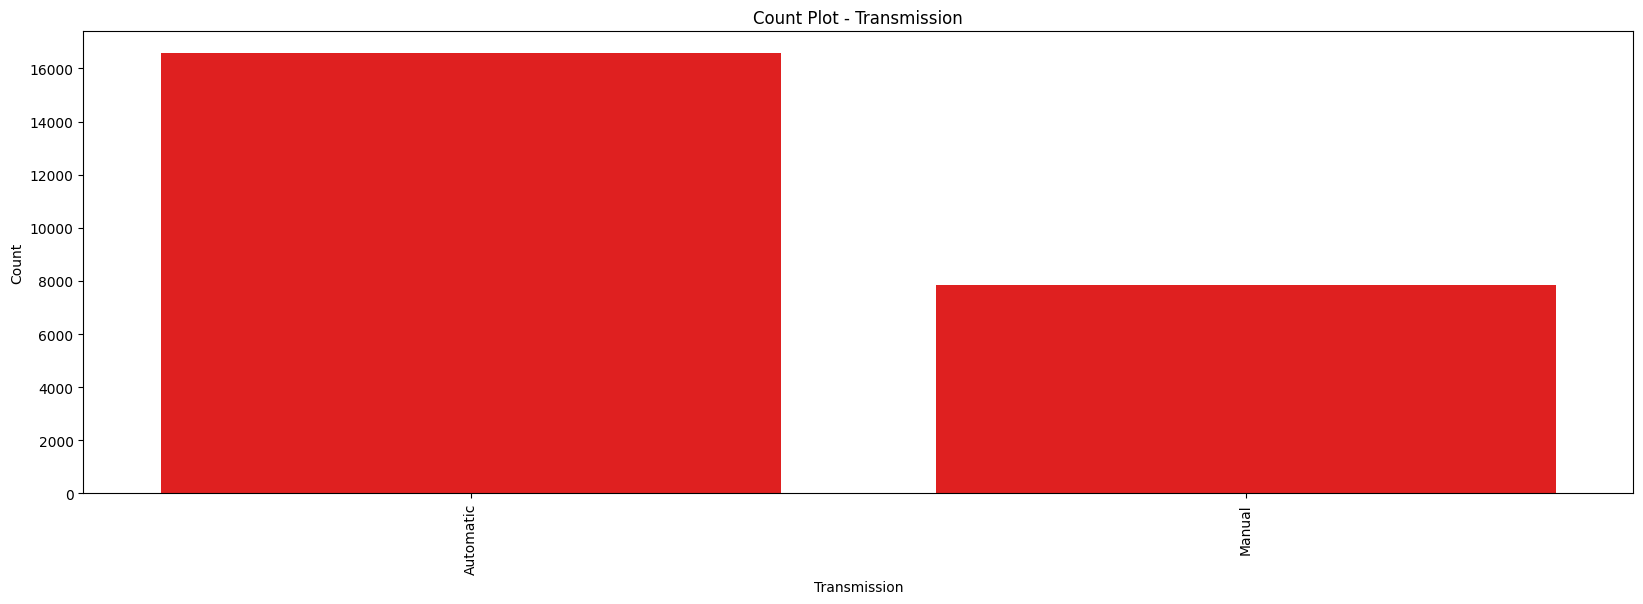

In [30]:
count_plot("Transmission")

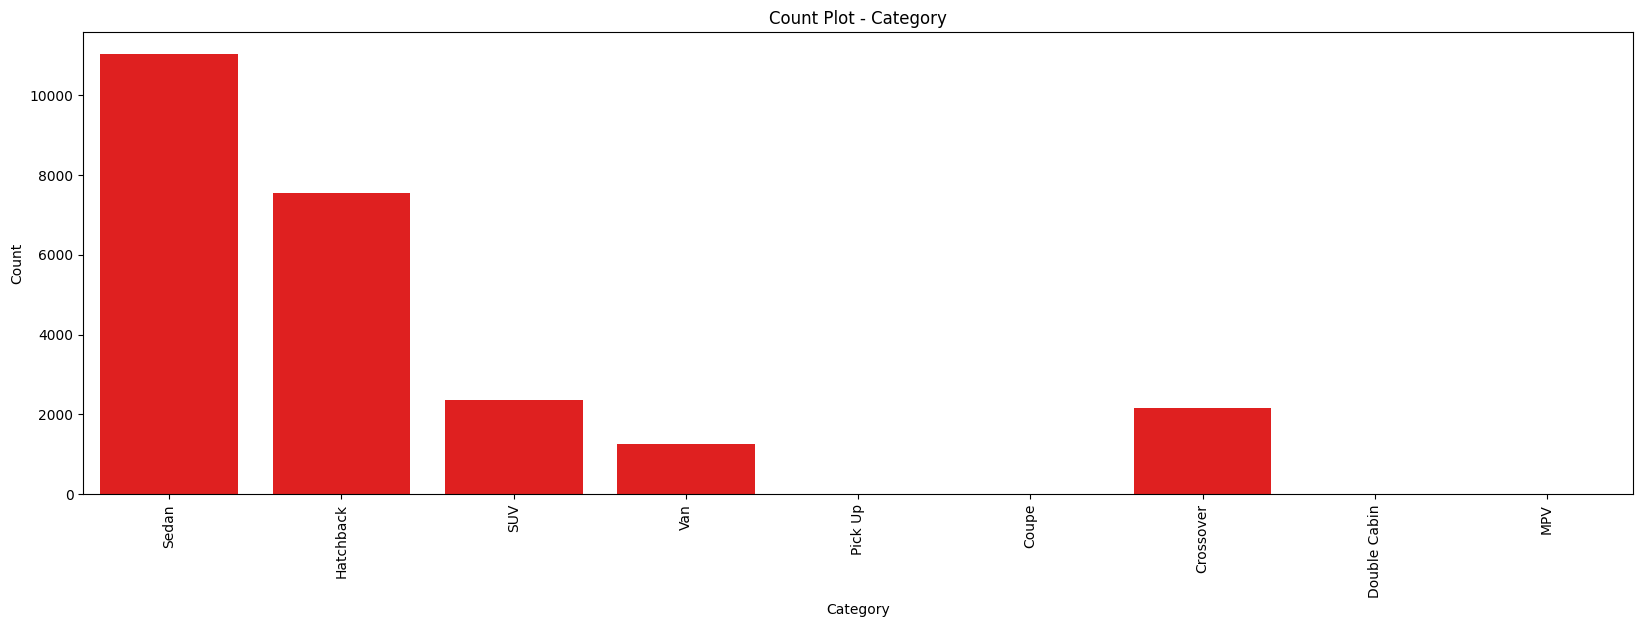

In [31]:
count_plot('Category')

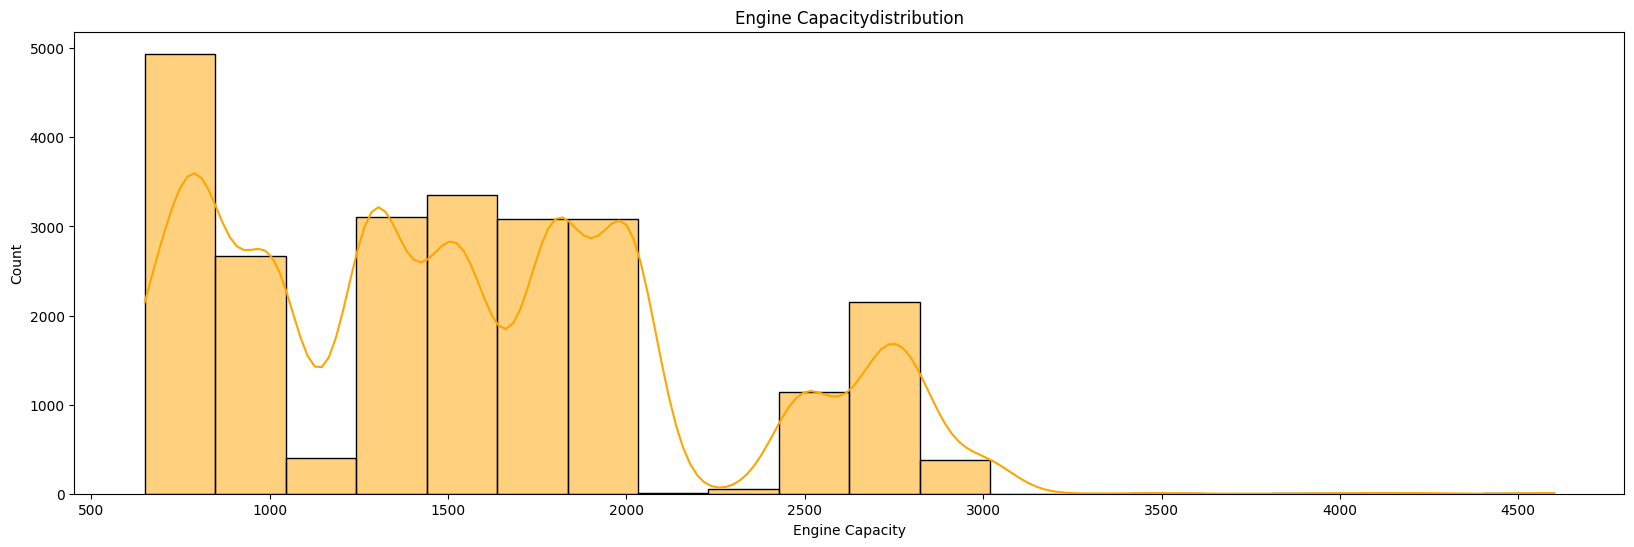

In [32]:
histogram('Engine Capacity')

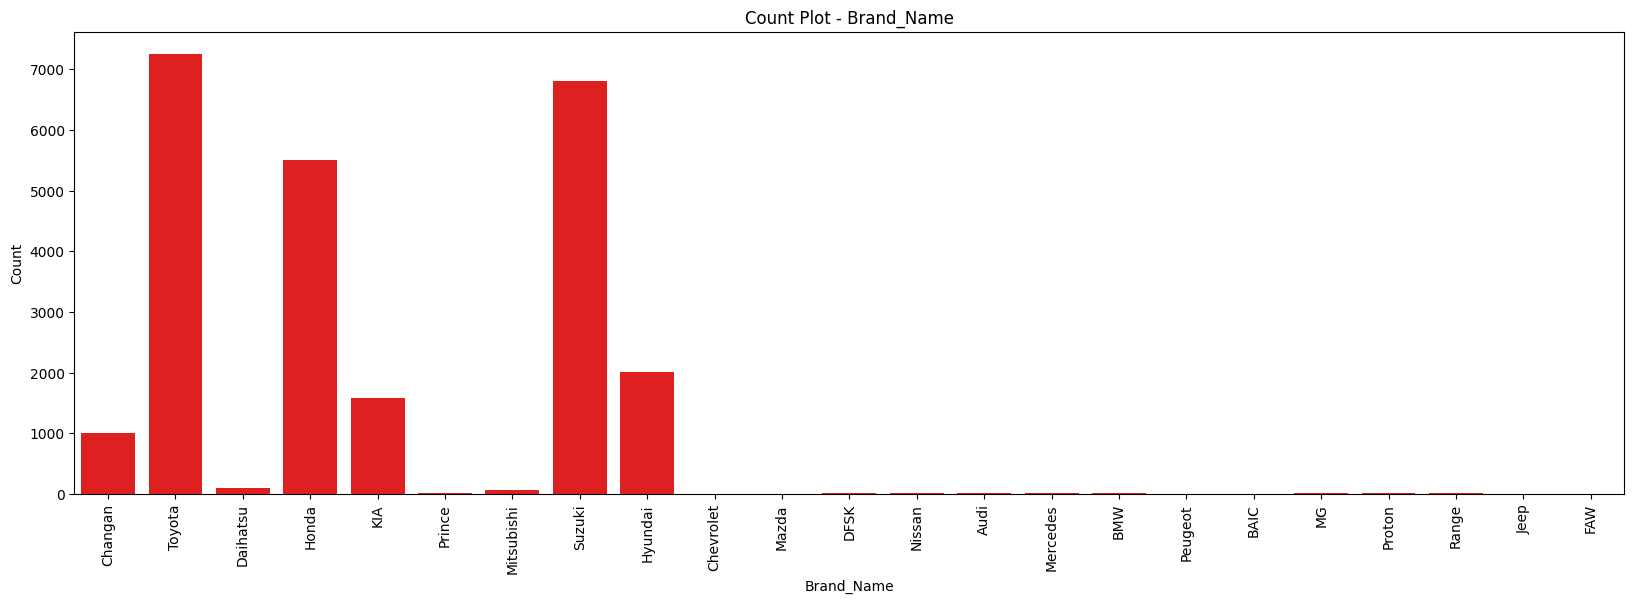

In [33]:
count_plot('Brand_Name')

### Visulizing the relation between different columns and price


In [34]:
# separating the categorical and numerical columns
categorical_columns = copy_dataset.select_dtypes(include=object).columns.to_list()
numerical_columns = copy_dataset.select_dtypes(exclude=object).columns.to_list()


In [35]:
print("Categorical Columns -->",categorical_columns)
print("Numerical Columns -->",numerical_columns)


Categorical Columns --> ['AD_Name', 'Category', 'Body Consition', 'Fuel Type', 'Transmission', 'Color', 'City Registered', 'Ad_link', 'Car_Name', 'Brand_Name']
Numerical Columns --> ['AD_id', 'Engine Capacity', 'model Year', 'Milage', 'Price', 'ad_Date']


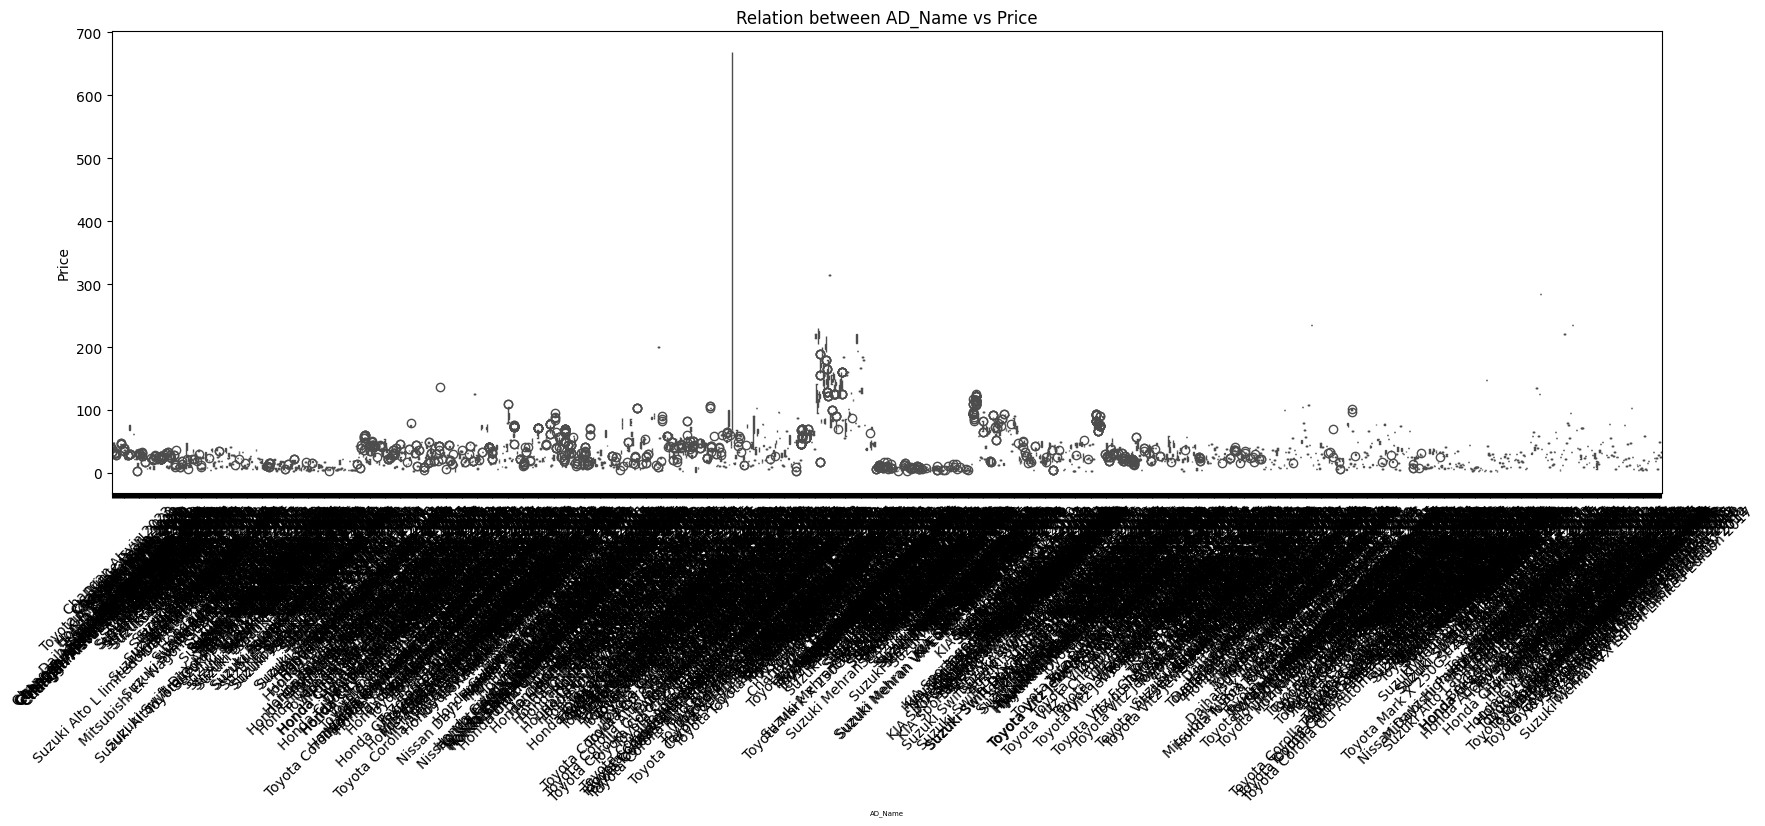

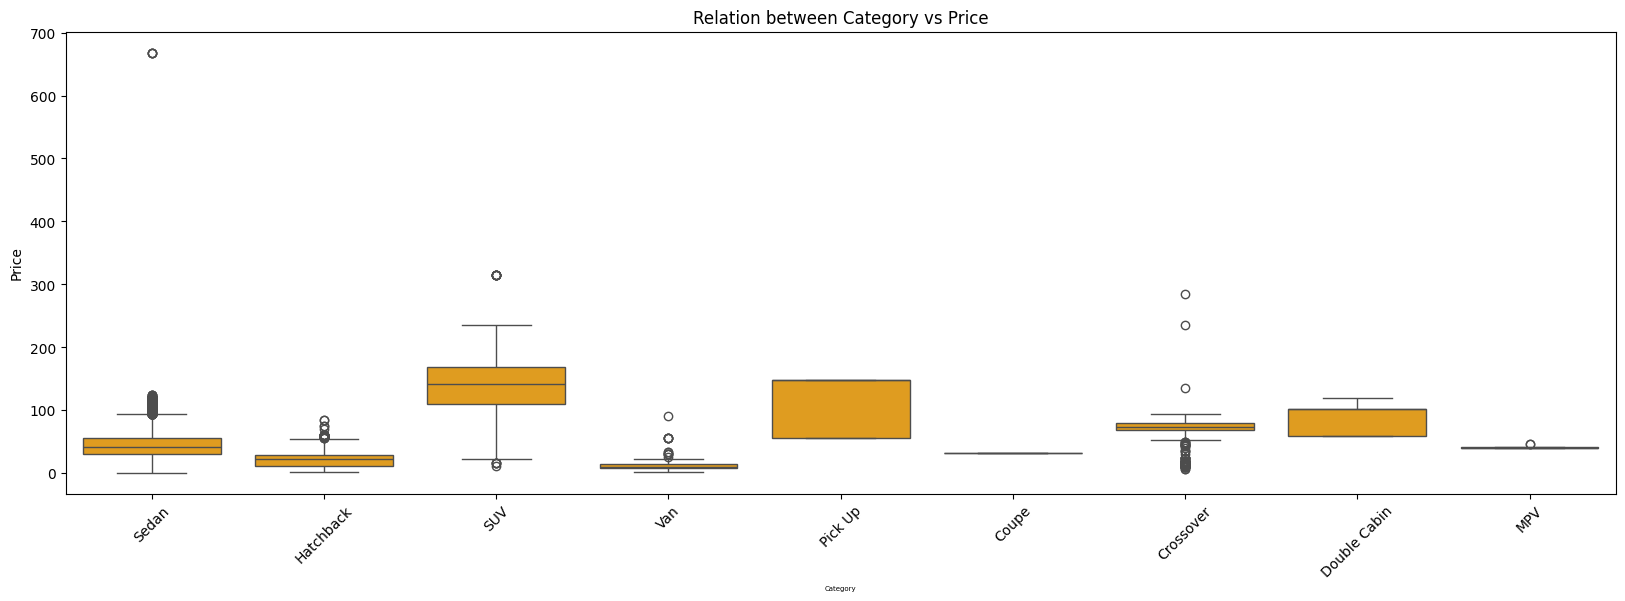

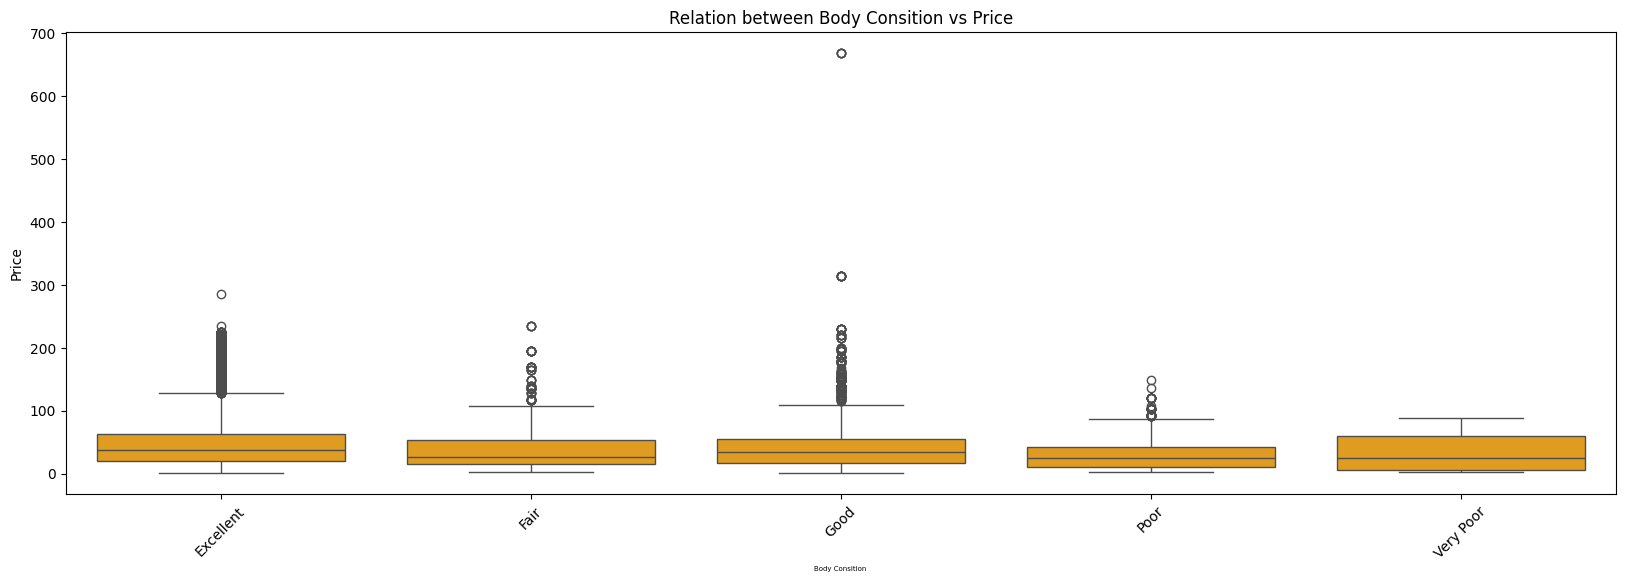

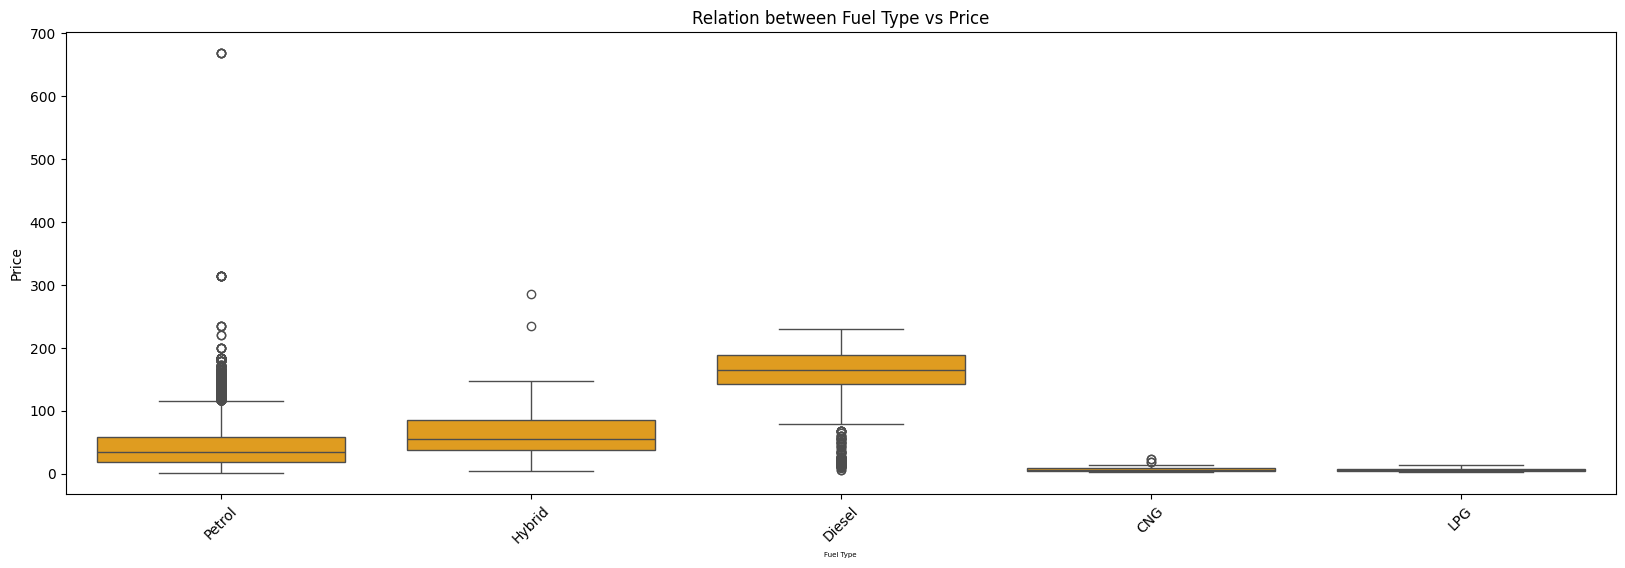

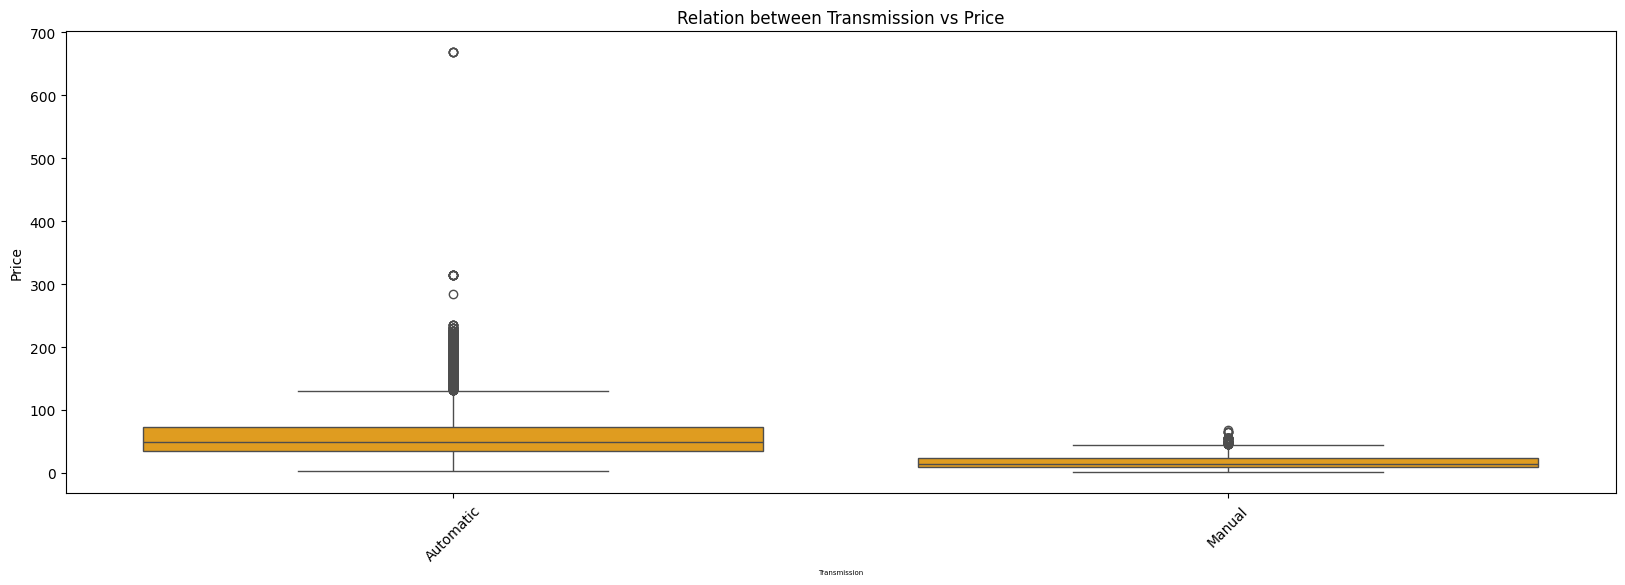

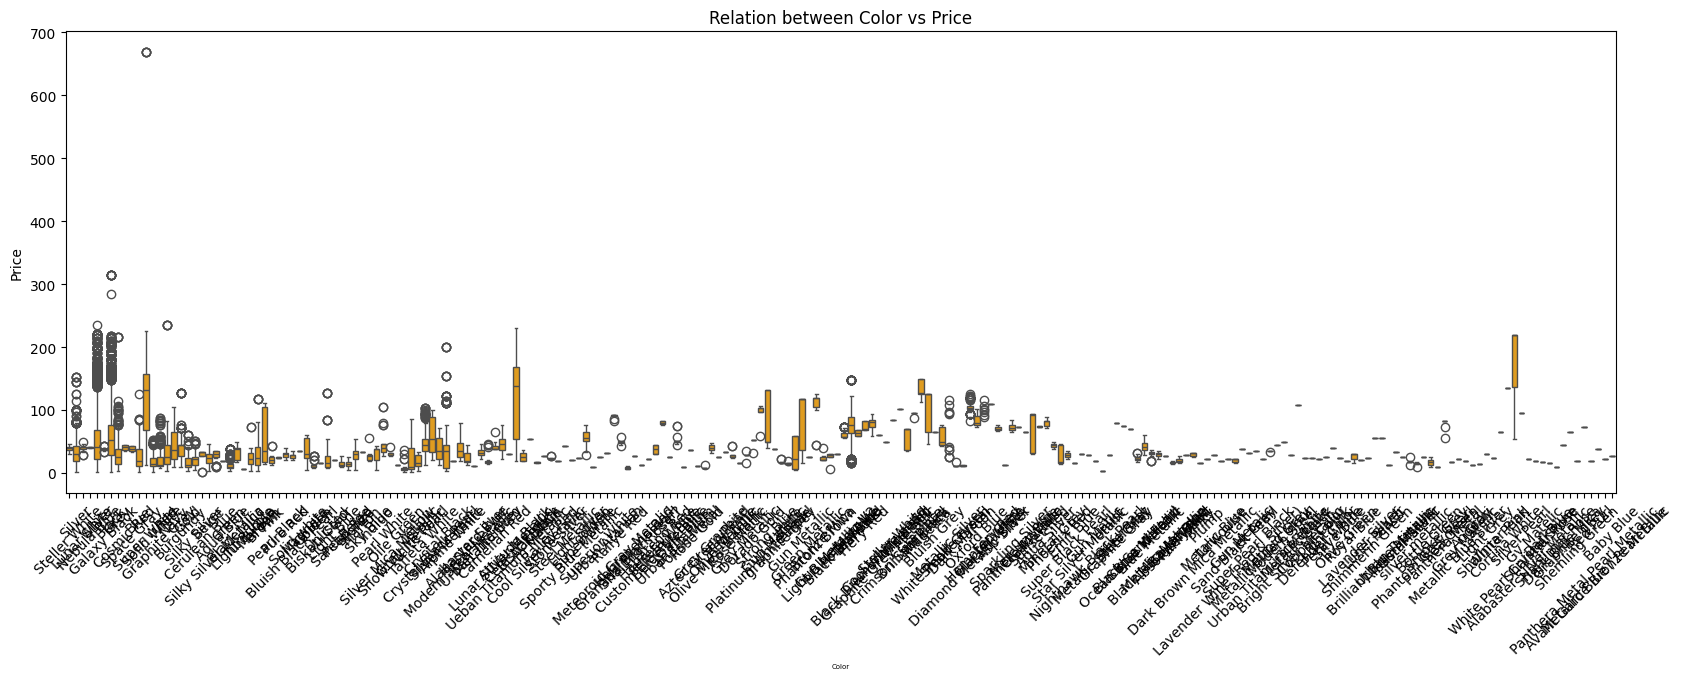

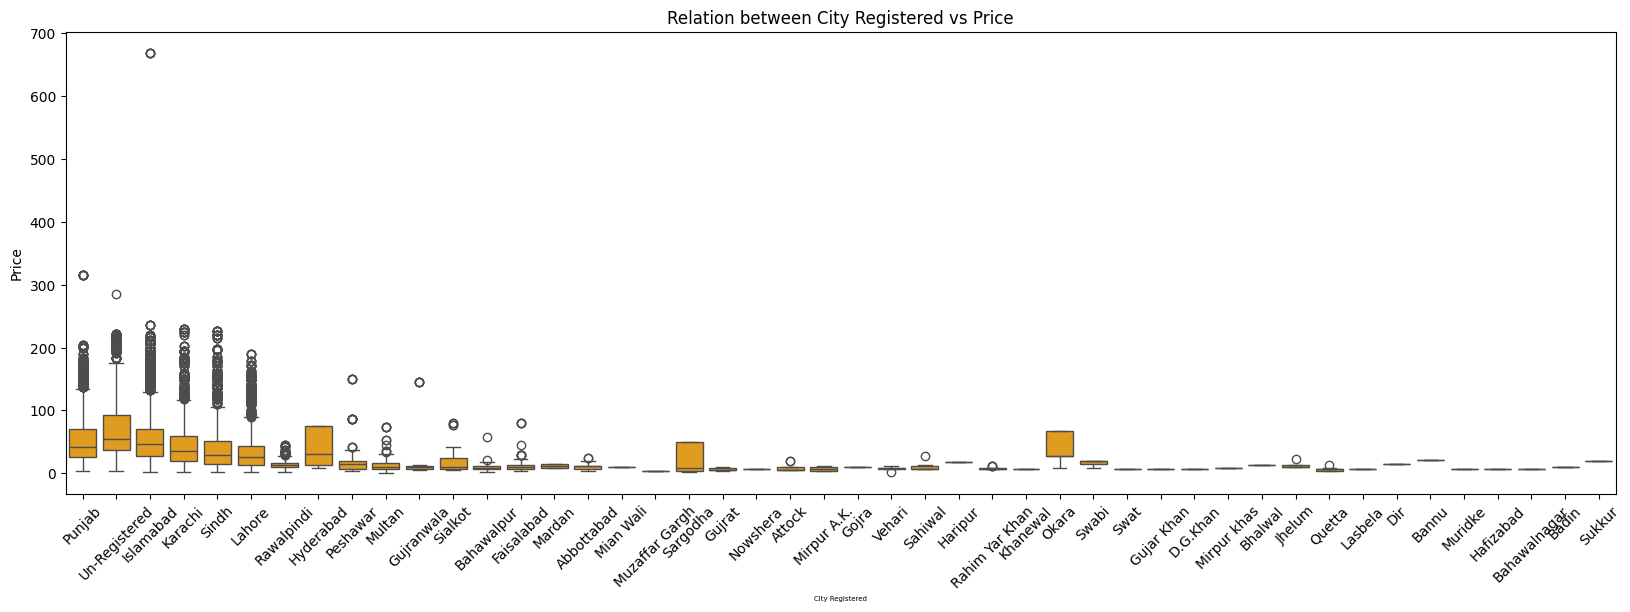

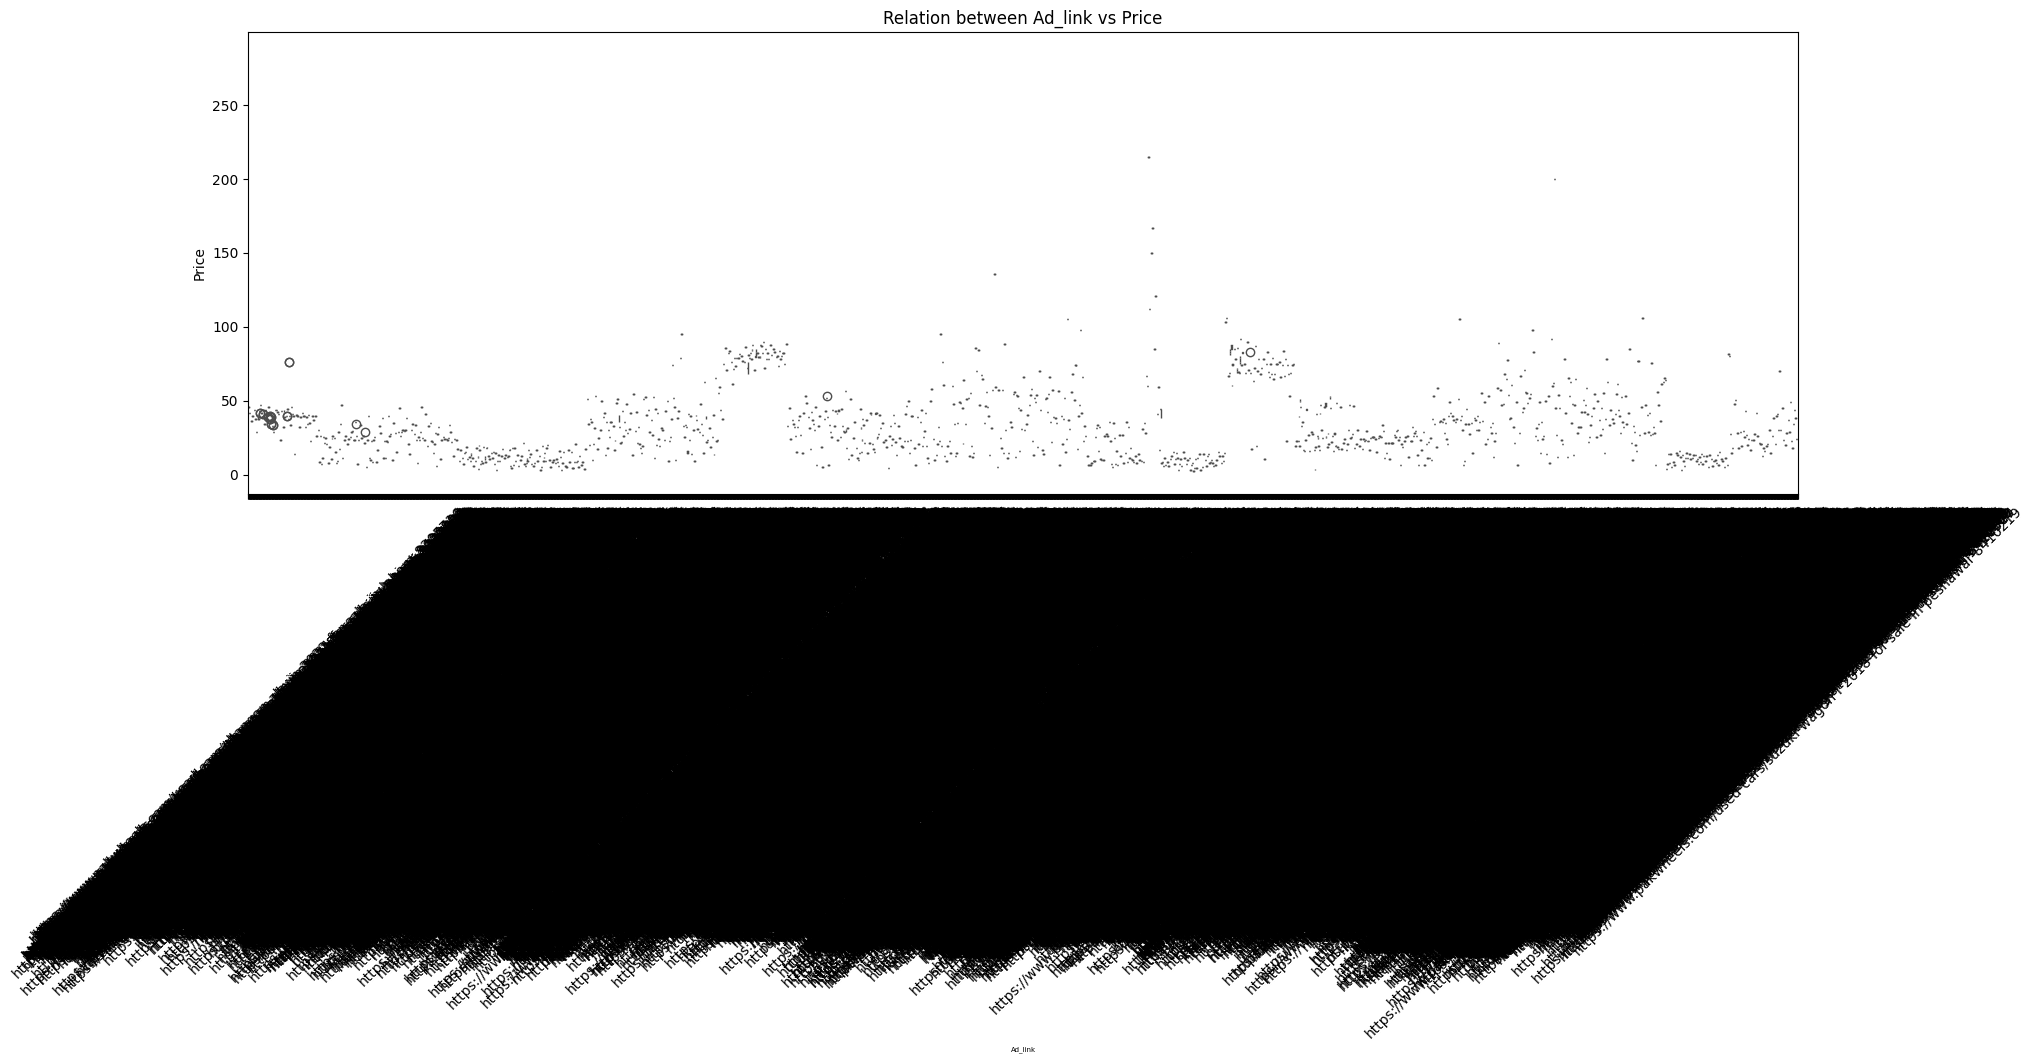

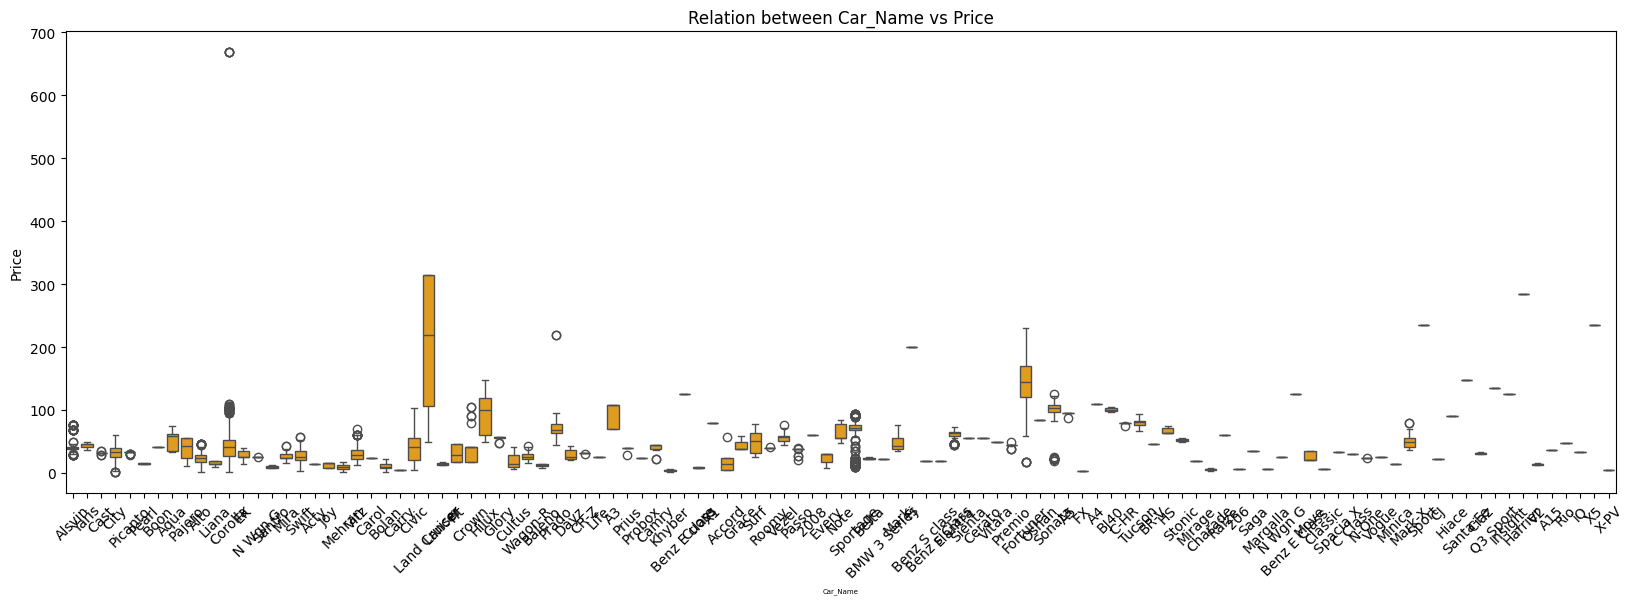

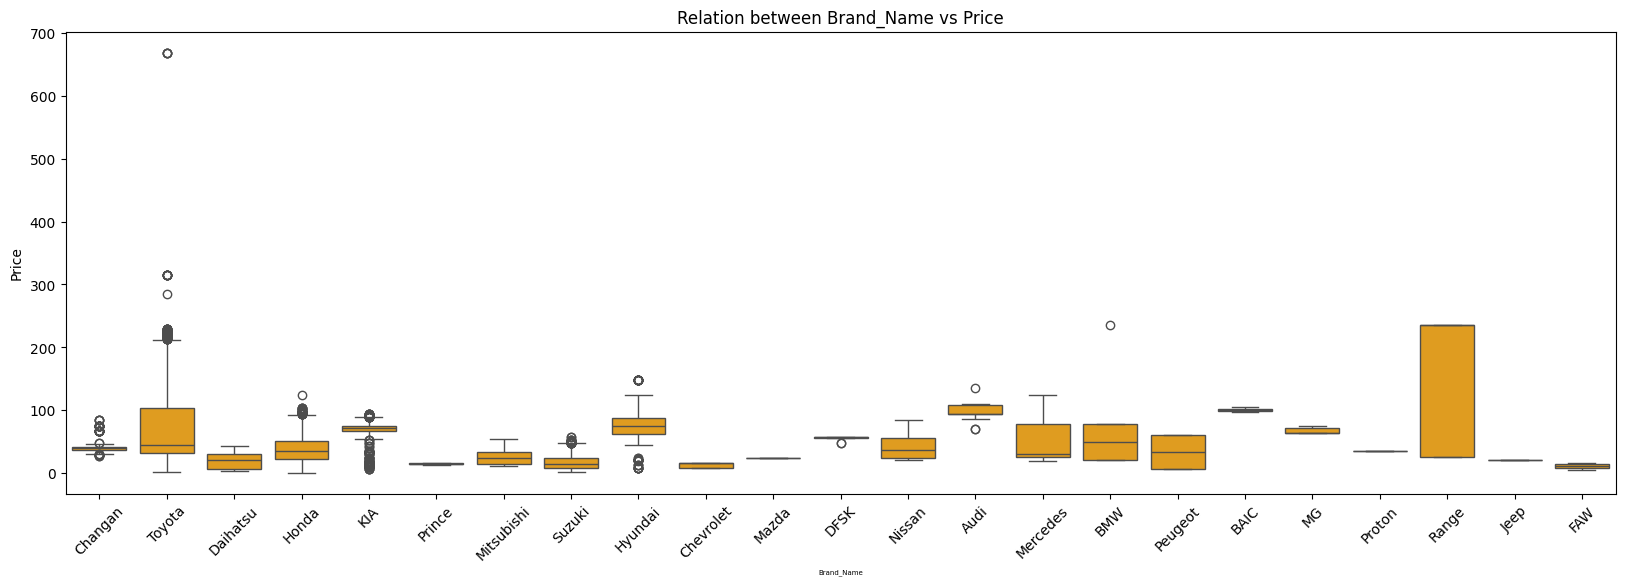

In [36]:
for col in categorical_columns:
    plt.figure(figsize=(20,6))
    sns.boxplot(x = col , y = "Price",data=copy_dataset,color='orange')
    plt.title(f'Relation between {col} vs Price')
    plt.xlabel(col,fontsize = 5)
    plt.ylabel('Price')
    plt.xticks(rotation = 45)
    plt.show()

Getting the relevent columns

In [37]:
dataset_for_training = pd.DataFrame(copy_dataset)

In [38]:
dataset_for_training

,AD_Name,AD_id,Engine Capacity,Category,Body Consition,model Year,Milage,Fuel Type,Transmission,Color,City Registered,Price,Ad_link,ad_Date,Car_Name,Brand_Name
0,Changan Alsvin 1.5L DCT Lumiere 2022,8205716.0,1500,Sedan,Excellent,2022,46000,Petrol,Automatic,Steller White,Punjab,39.00,https://www.pakwheels.com/used-cars/changan-al...,2024-02-23,Alsvin,Changan
1,Toyota Yaris Hatchback 2020,8284829.0,1000,Sedan,Excellent,2020,100000,Petrol,Automatic,Silver,Un-Registered,45.75,https://www.pakwheels.com/used-cars/toyota-yar...,2024-02-23,Yaris,Toyota
2,Changan Alsvin 1.5L DCT Lumiere 2023,8422204.0,1500,Sedan,Excellent,2023,14717,Petrol,Automatic,Lunar Silver,Islamabad,42.50,https://www.pakwheels.com/used-cars/changan-al...,2024-02-23,Alsvin,Changan
3,Changan Alsvin 1.5L DCT Comfort 2022,8367180.0,1500,Sedan,Excellent,2022,40737,Petrol,Automatic,Steller White,Islamabad,31.00,https://www.pakwheels.com/used-cars/changan-al...,2024-02-23,Alsvin,Changan
4,Changan Alsvin 1.5L DCT Lumiere 2021,8307134.0,1500,Sedan,Excellent,2021,59155,Petrol,Automatic,Steller White,Karachi,35.00,https://www.pakwheels.com/used-cars/changan-al...,2024-02-23,Alsvin,Changan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24717,Honda City i-DSI 2006,8404583.0,1300,Sedan,Excellent,2006,235000,Petrol,Manual,Blue,Sindh,16.75,https://www.pakwheels.com/used-cars/honda-city...,2024-02-19,City,Honda
24718,Honda Civic Oriel 1.8 i-VTEC CVT 2017,8317239.0,1800,Sedan,Excellent,2017,57000,Petrol,Automatic,White,Islamabad,50.75,https://www.pakwheels.com/used-cars/honda-civi...,2024-02-22,Civic,Honda
24719,Suzuki Wagon R Hybrid FX 2018,8410219.0,650,Hatchback,Excellent,2018,148450,Hybrid,Automatic,Turquoise,Islamabad,33.20,https://www.pakwheels.com/used-cars/suzuki-wag...,2024-02-21,Wagon-R,Suzuki
24720,Suzuki Wagon R VXL 2022,8411910.0,1000,Hatchback,Excellent,2022,11000,Petrol,Manual,Solid White,Punjab,30.15,https://www.pakwheels.com/used-cars/suzuki-wag...,2024-02-21,Wagon-R,Suzuki


## Droppping un-wanted columns

In [39]:
dataset_for_training.drop(columns=['AD_Name','AD_id','Ad_link',	'ad_Date'],inplace=True)


In [40]:
dataset_for_training.head()

,Engine Capacity,Category,Body Consition,model Year,Milage,Fuel Type,Transmission,Color,City Registered,Price,Car_Name,Brand_Name
0,1500,Sedan,Excellent,2022,46000,Petrol,Automatic,Steller White,Punjab,39.00,Alsvin,Changan
1,1000,Sedan,Excellent,2020,100000,Petrol,Automatic,Silver,Un-Registered,45.75,Yaris,Toyota
2,1500,Sedan,Excellent,2023,14717,Petrol,Automatic,Lunar Silver,Islamabad,42.50,Alsvin,Changan
3,1500,Sedan,Excellent,2022,40737,Petrol,Automatic,Steller White,Islamabad,31.00,Alsvin,Changan
4,1500,Sedan,Excellent,2021,59155,Petrol,Automatic,Steller White,Karachi,35.00,Alsvin,Changan


In [41]:
dataset_for_training = dataset_for_training[['Car_Name','Brand_Name','Engine Capacity','Category','Body Consition','model Year','Milage','Fuel Type','Transmission','Color','City Registered',
                                        'Price']]

In [42]:
dataset_for_training

,Car_Name,Brand_Name,Engine Capacity,Category,Body Consition,model Year,Milage,Fuel Type,Transmission,Color,City Registered,Price
0,Alsvin,Changan,1500,Sedan,Excellent,2022,46000,Petrol,Automatic,Steller White,Punjab,39.00
1,Yaris,Toyota,1000,Sedan,Excellent,2020,100000,Petrol,Automatic,Silver,Un-Registered,45.75
2,Alsvin,Changan,1500,Sedan,Excellent,2023,14717,Petrol,Automatic,Lunar Silver,Islamabad,42.50
3,Alsvin,Changan,1500,Sedan,Excellent,2022,40737,Petrol,Automatic,Steller White,Islamabad,31.00
4,Alsvin,Changan,1500,Sedan,Excellent,2021,59155,Petrol,Automatic,Steller White,Karachi,35.00
...,...,...,...,...,...,...,...,...,...,...,...,...
24717,City,Honda,1300,Sedan,Excellent,2006,235000,Petrol,Manual,Blue,Sindh,16.75
24718,Civic,Honda,1800,Sedan,Excellent,2017,57000,Petrol,Automatic,White,Islamabad,50.75
24719,Wagon-R,Suzuki,650,Hatchback,Excellent,2018,148450,Hybrid,Automatic,Turquoise,Islamabad,33.20
24720,Wagon-R,Suzuki,1000,Hatchback,Excellent,2022,11000,Petrol,Manual,Solid White,Punjab,30.15


In [ ]:
# Saving the Training Dataset as csv file so that we do not loose it
dataset_for_training.to_csv("Dataset_for_training.csv")

# Now its time for making Pipeline and Model 🚀

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction import FeatureHasher 
from sklearn import set_config
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

import pandas as pd

### Reading the dataset

In [44]:
dataset_for_training = pd.read_csv("Dataset_for_training.csv")

In [ ]:
dataset_for_training.columns

In [ ]:
dataset_for_training.head()

In [45]:
# dropping the unwanted column
dataset_for_training.drop(columns=['Unnamed: 0'] , axis=1,inplace=True)

In [ ]:
dataset_for_training.head()

In [ ]:
dataset_for_training.columns

In [46]:
dataset_for_training = dataset_for_training[['model Year','Milage','City Registered','Color','Engine Capacity','Brand_Name','Car_Name','Transmission','Fuel Type','Body Consition','Category','Price']]

<Axes: xlabel='Brand_Name'>

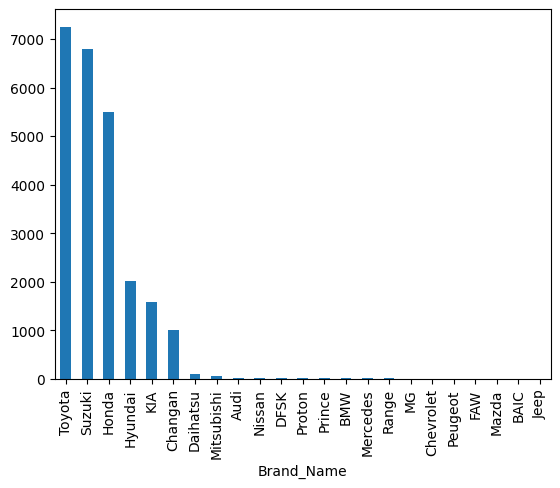

In [47]:
dataset_for_training.Brand_Name.value_counts().nlargest(30).plot(kind='bar')

### Convert all data to lowercase 
for better understanding

In [48]:
lower_case_string = lambda x : x.lower() if isinstance(x,str) else x
dataset_for_training = dataset_for_training.map(lower_case_string)

In [49]:
dataset_for_training.head()

,model Year,Milage,City Registered,Color,Engine Capacity,Brand_Name,Car_Name,Transmission,Fuel Type,Body Consition,Category,Price
0,2022,46000,punjab,steller white,1500,changan,alsvin,automatic,petrol,excellent,sedan,39.00
1,2020,100000,un-registered,silver,1000,toyota,yaris,automatic,petrol,excellent,sedan,45.75
2,2023,14717,islamabad,lunar silver,1500,changan,alsvin,automatic,petrol,excellent,sedan,42.50
3,2022,40737,islamabad,steller white,1500,changan,alsvin,automatic,petrol,excellent,sedan,31.00
4,2021,59155,karachi,steller white,1500,changan,alsvin,automatic,petrol,excellent,sedan,35.00


### Spliting the Data


In [50]:
dataset_for_training.dtypes

model Year           int64
Milage               int64
City Registered     object
Color               object
Engine Capacity      int64
Brand_Name          object
Car_Name            object
Transmission        object
Fuel Type           object
Body Consition      object
Category            object
Price              float64
dtype: object

In [51]:
print('Total Data is -->',dataset_for_training.shape[0])

Total Data is --> 24398


In [52]:
x_train,x_test , y_train,y_test = train_test_split(dataset_for_training.drop(columns=['Price'],axis= 1), dataset_for_training['Price'], test_size=0.3,random_state=12)

In [53]:
print(f'Shape of Training Data -->\n Training Data --> {x_train.shape[0]}\n Training Label --> {y_train.shape[0]}')

Shape of Training Data -->
 Training Data --> 17078
 Training Label --> 17078


In [54]:
print(f'Shape of Testing Data -->\n Test Data --> {x_test.shape[0]}\n Test Label --> {y_test.shape[0]}')

Shape of Testing Data -->
 Test Data --> 7320
 Test Label --> 7320


## Trying Linear Regression

In [ ]:
# Transformers

tf1_lr = ColumnTransformer([('OHE',OneHotEncoder(drop = 'first', handle_unknown='ignore'),[8,9])],remainder = 'passthrough')
tf2_lr = ColumnTransformer([('Ordianl Encoding',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=np.nan),[5,6,7,8,9,10])],remainder='passthrough')
tf3_lr = ColumnTransformer([('Nan Imputer' , SimpleImputer(missing_values = np.nan , strategy = 'most_frequent') , slice(0,10))])
tf4_lr = ColumnTransformer([('Standard Scaler', StandardScaler(), slice(0,10))])

# Model Linear Regression
m_lr = LinearRegression()


In [ ]:
# Defining the pipeline
pipe_lr = Pipeline([
    ('One Hot Encoder',tf1_lr),
    ('Ordinal Encoding',tf2_lr),
    ('Nan Imputer',tf3_lr),
    ('StandardScaler',tf4_lr),
    ('Linear Regression',m_lr)])

In [ ]:
# fitting the pipeline with the training data
pipe_lr.fit(x_train,y_train)

In [ ]:
# predicting the model on the test data
y_predict_lr = pipe_lr.predict(x_test)
y_predict_lr

In [ ]:
print("----------- Evaluation Matrices of Linear Regression Model ---------")
print("MAE = ",mean_absolute_error(y_test,y_predict_lr))
print("MSE = ",mean_squared_error(y_test,y_predict_lr))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,y_predict_lr)))
print('r2 Score = ',r2_score(y_test,y_predict_lr))


In [ ]:
import pickle

# Save the pipeline using pickle
with open('Price_prediction.pkl', 'wb') as file:
    pickle.dump(pipe_lr, file)


In [ ]:
with open('Price_prediction.pkl', 'rb') as file:
    loaded_pipe_lr = pickle.load(file)

In [ ]:
pipe_lr.predict([[2021,46000,'punjab','steller white',1500,'changan','alsvin','manual','petrol','good','sedan']])


## Decision Tree Regression

In [55]:
# Transformers

tf1_lr = ColumnTransformer([('OHE',OneHotEncoder(drop = 'first', handle_unknown='ignore'),[7,8])],remainder = 'passthrough')
tf2_lr = ColumnTransformer([('Ordianl Encoding',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=np.nan),[5,6,7,8,9,10])],remainder='passthrough')
tf3_lr = ColumnTransformer([('Nan Imputer' , SimpleImputer(missing_values = np.nan , strategy = 'most_frequent') , slice(0,11))])
tf4_lr = ColumnTransformer([('Standard Scaler', StandardScaler(), slice(0,11))])

# Model Linear Regression
m_lr = DecisionTreeRegressor()

# Defining the pipeline
pipe_lr = Pipeline([
    ('One Hot Encoder',tf1_lr),
    ('Ordinal Encoding',tf2_lr),
    ('Nan Imputer',tf3_lr),
    ('StandardScaler',tf4_lr),
    ('Linear Regression',m_lr)])


# fitting the pipeline with the training data
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('One Hot Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [7, 8])])),
                ('Ordinal Encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Ordianl Encoding',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  [5, 6, 7, 8, 9, 10])])),
                ('Nan Imputer',
                 ColumnTransformer(transformers=[('Nan Imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  slice(0, 11, None))])),
                ('StandardScaler',
                 ColumnTransformer(transformers=[('Standard Scaler',
                                                  StandardScaler(),
                                                  slice(0, 11, None))])),
                ('Linear Regression', DecisionTreeRegressor())])

In [56]:
# predicting the model on the test data
y_predict_lr = pipe_lr.predict(x_test)
y_predict_lr

array([ 9.15, 18.  , 86.45, ..., 41.  , 51.5 ,  3.7 ])

In [57]:
print("----------- Evaluation Matrices of Linear Regression Model ---------")
print("MAE = ",mean_absolute_error(y_test,y_predict_lr))
print("MSE = ",mean_squared_error(y_test,y_predict_lr))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,y_predict_lr)))
print('r2 Score = ',r2_score(y_test,y_predict_lr))


----------- Evaluation Matrices of Linear Regression Model ---------
MAE =  1.177905454973078
MSE =  13.208646412628266
RMSE =  3.634370153496788
r2 Score =  0.9920280823301356


In [ ]:
x_test.tail()

In [ ]:
y_test.tail()

In [ ]:
print(y_predict_lr[-1])
print(y_predict_lr[-2])
print(y_predict_lr[-3])
print(y_predict_lr[-4])

print(y_predict_lr[-5])

In [ ]:
pipe_lr.predict([[2024,10,'un-registered','gray',1800,'honda','civic','automatic','petrol','good','sedan']])


## Trying XGboost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# Transformers

tf1_lr = ColumnTransformer([('OHE',OneHotEncoder(drop = 'first', handle_unknown='ignore'),[7,8])],remainder = 'passthrough')
tf2_lr = ColumnTransformer([('Ordianl Encoding',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=np.nan),[5,6,7,8,9,10])],remainder='passthrough')
tf3_lr = ColumnTransformer([('Nan Imputer' , SimpleImputer(missing_values = np.nan , strategy = 'most_frequent') , slice(0,11))])
tf4_lr = ColumnTransformer([('Standard Scaler', StandardScaler(), slice(0,11))])

# Model Linear Regression
m_lr = XGBRegressor()

# Defining the pipeline
pipe_lr = Pipeline([
    ('One Hot Encoder',tf1_lr),
    ('Ordinal Encoding',tf2_lr),
    ('Nan Imputer',tf3_lr),
    ('StandardScaler',tf4_lr),
    ('Linear Regression',m_lr)])


# fitting the pipeline with the training data
pipe_lr.fit(x_train,y_train)

In [ ]:
# predicting the model on the test data
y_predict_lr = pipe_lr.predict(x_test)
print('XGBoost Prediction',y_predict_lr)

In [ ]:
print("----------- Evaluation Matrices of Linear Regression Model ---------")
print("MAE = ",mean_absolute_error(y_test,y_predict_lr))
print("MSE = ",mean_squared_error(y_test,y_predict_lr))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,y_predict_lr)))
print('r2 Score = ',r2_score(y_test,y_predict_lr))


### Now Random Forest Regressor

In [ ]:
# Transformers

tf1_lr = ColumnTransformer([('OHE',OneHotEncoder(drop = 'first', handle_unknown='ignore'),[7,8])],remainder = 'passthrough')
tf2_lr = ColumnTransformer([('Ordianl Encoding',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=np.nan),[5,6,7,8,9,10])],remainder='passthrough')
tf3_lr = ColumnTransformer([('Nan Imputer' , SimpleImputer(missing_values = np.nan , strategy = 'most_frequent') , slice(0,11))])
tf4_lr = ColumnTransformer([('Standard Scaler', StandardScaler(), slice(0,11))])

# Model Linear Regression
m_lr = RandomForestRegressor()

# Defining the pipeline
pipe_lr = Pipeline([
    ('One Hot Encoder',tf1_lr),
    ('Ordinal Encoding',tf2_lr),
    ('Nan Imputer',tf3_lr),
    ('StandardScaler',tf4_lr),
    ('Linear Regression',m_lr)])


# fitting the pipeline with the training data
pipe_lr.fit(x_train,y_train)

In [ ]:
y_predict_lr = pipe_lr.predict(x_test)
print('Random Forest Prediction',y_predict_lr)

In [ ]:
print("----------- Evaluation Matrices of Random Forest Model ---------")
print("MAE = ",mean_absolute_error(y_test,y_predict_lr))
print("MSE = ",mean_squared_error(y_test,y_predict_lr))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,y_predict_lr)))
print('r2 Score = ',r2_score(y_test,y_predict_lr))


In [ ]:
import gradio as gr

model Year	Milage	City Registered	Color	Engine Capacity	Brand_Name	Car_Name	Transmission	Fuel Type	Body Consition	Category

In [ ]:
pipe_lr.predict([[2015,150000,'multan','gray',1800,'honda','civic','automatic','petrol','good','sedan']])


In [1]:
import gradio as gr

def ok(car_brand, car_name, model_year, mileage, city_registered, color, engine_c, trans, fuel_type, Body_C, Cate):
    print(car_brand, car_name, model_year, mileage, city_registered, color, engine_c, trans, fuel_type, Body_C, Cate)
    predict = pipe_lr.predict([[model_year,mileage,city_registered,color,engine_c,car_brand,car_name,trans,fuel_type,Body_C,Cate]])
    return f"{[predict[0]]} lacs"
years_list = list(range(2024, 1899, -1))

gr.Interface(fn=ok, 
              inputs=[gr.Dropdown(['suzuki','toyota','honda','kia'], label='Brand'),
                      gr.Textbox(lines=1, label="Car Name"),
                      gr.Dropdown(choices=years_list, label='Model Year'),
                      gr.Number(label="Mileage Km"),
                      gr.Textbox(lines=1, label="City Register"),
                      gr.Textbox(lines=1, label="Color"),
                      gr.Number(label="Engine Capacity in CC"),
                      gr.Radio(["automatic", "manual"], label="Transmission Type"),
                      gr.Radio(["hybrid", "petrol",'diesel'], label="Fuel Type"),
                      gr.Radio(['excellent','good','fair','poor'], label="Body Condition"),
                      gr.Radio(["hatchback", "sedan",'suv','croosover'], label="Category")],
              outputs=gr.Textbox(label="Result")).launch()


c:\Users\M_ros\anaconda3\envs\fyp2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on local URL:  http://127.0.0.1:7878

To create a public link, set `share=True` in `launch()`.
